In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

data = pd.read_csv('train\\hard\\hard.csv')[['Pic', 'NumCircles']]
img_list = []
for i in range(1000):
    temp = cv2.imread("train\\hard\\" + '{:05}'.format(i) + '.png')
    img_list.append(cv2.resize(temp,(480, 480)))
    

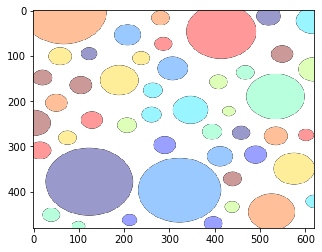

In [87]:
plt.imshow(img_list[1])
plt.show()

cv2.imshow("Image", img_list[1])
cv2.waitKey()
cv2.destroyAllWindows()

44 46


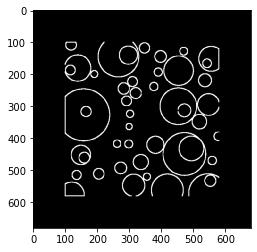

In [35]:
def len_circles(circles):
    if circles is None:
        return 0
    else:
        return len(circles[0])

def count_num(img, trs=50):
    k_size = 3    
    g_size = 5
    bordersize = 100
    
    img=cv2.copyMakeBorder(img, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize,
                              borderType= cv2.BORDER_CONSTANT, value=[255,255,255] )
    
    kernel = np.ones((k_size,k_size),np.uint8)
    #img = cv2.GaussianBlur(img, (g_size,g_size),0)
    
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, img_threshold = cv2.threshold(img_grey, trs, 255, cv2.THRESH_BINARY)    
    
    img_grey = cv2.Laplacian(img_grey,cv2.CV_8U)
    img_grey = cv2.dilate(img_grey, kernel,iterations = 1)
    ret, img_grey = cv2.threshold(img_grey, trs, 255, cv2.THRESH_BINARY)
    img_grey = cv2.GaussianBlur(img_grey, (g_size,g_size),0)
    
    circles = cv2.HoughCircles(img_grey,cv2.HOUGH_GRADIENT, 1, 20, param1=5,param2=30,minRadius=6,maxRadius=85)    
    return img_grey, len_circles(circles), circles


#test_idx = 118
test_idx = 4
g, n, circles = count_num(img_list[test_idx])
print(n, data['NumCircles'][test_idx])

cimg = img_list[test_idx].copy()
bordersize = 100
cimg = cv2.copyMakeBorder(cimg, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize,
                              borderType= cv2.BORDER_CONSTANT, value=[255,255,255] )
if (n > 0):
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(cimg,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
        # draw the center of the circle
        cv2.circle(cimg,(int(i[0]),int(i[1])),2,(0,0,255),3)
cv2.imshow("Orig", img_list[test_idx])
cv2.imshow("Find", cimg)
cv2.imshow("Grey", g)
cv2.waitKey()
cv2.destroyAllWindows()

plt.imshow(g,cmap='gray')
plt.show()

In [36]:
n_pred_list = []
err_list = []
for i, img_i in enumerate(img_list):
    img_mod_i, n_pred_i, circles_i = count_num(img_i)
    n_pred_list.append(n_pred_i)
    n_true_i = data['NumCircles'][i]
    err_i = (float(n_true_i) - float(n_pred_i))/float(n_true_i)
    err_list.append(err_i)
    #print(n_true_i, n_pred_i, )
    
n_true = data['NumCircles'].to_numpy()
n_pred = np.array(n_pred_list)
err = np.array(err_list)

print(np.mean(err))
print('========')
print(n_pred - n_true)

-0.006984404075126097
[ 0  3 -1  0 -2  4  2  0 -1 -2  0 -4  4 -3  0  3 -1  1 -2  4 -1  0  2  1
 -2  2 -2  3 -4 -1 -2  1  2  4 -2 -2  1 -3  0  2  2 -3 -1 -1 -2  6  0  4
  1  8 -2 -2  7 -2  4  2  0  0  0  2 -3 -2 -1  3  1  5  4  6  1 -4 -3  2
  0  4 -1  0  6  0 -1  1  0  3  2 -2  3  3  1  3  3  2  2  0  0 -1 -2 -3
  1 -1  3 -5  2  3 -1  2  0  1  0  0 -5  0  2  4  1  3  0  0 -3  0 -4  1
 -1 -3  0 -1  1  0 -1 -6  2  0 -1 -1 -2 -1  0  0  2 -2 -3  3 -1 -2  0 -6
  0  1  5  1 -2 -1  5  3 -1 -1  0  2  2 -1 -1  0 -2 -3 -1  1  0  0 -1  3
  1 -1  1 -1  0  0  0  1 -1  3  3  0  0  1  0  5  0 -3  0  1 -1  1  4 -4
 11  4 -6 -2  1 -2  1 -2 -3 -2  0  0  7  3 -1  2  2 -3 -2  4 -1 -2 -1  0
  1  2  0  4  4 -4  2  0 -2  3  2 -1  0  6  3  5  1  5  2 -3  2  2 -1 -1
 -1  4  6 -3  2  3 -3  1  1  0  2 -2  3  1  0  0  0  1 -1  0 13 -2 -1 -2
  2  0  0  0  4 -5 -1  2  2  0  1 -3 -5 -3  0 -4  2  3  0 -2  7 -1  5  1
  0 -2  0  0 -2 -2 -2  4 -2  0  0 -3 -1  0  1 -1  0  1  0  2  1  0 -2  1
  0  0  2  3  0  1  6  0 -2 -

In [37]:
# Эта их прекрасная метрика
contribs = (1 - np.abs(n_true-n_pred)/10.)
contribs[contribs < 0] = 0
contribs.sum()

808.8000000000001

In [38]:
# Теперь считаем sub
img_sub_list = []
for i in range(500):
    temp = cv2.imread("test\\hard\\" + '{:05}'.format(i) + '.png')
    img_sub_list.append(cv2.resize(temp,(480, 480)))
    
n_pred_sub_list = []
for i, img_i in enumerate(img_sub_list):
    img_mod_i, n_pred_i, circles_i = count_num(img_i)
    n_pred_sub_list.append(n_pred_i)
    
n_pred_sub = np.array(n_pred_sub_list)
n_pred_sub

out_df = pd.DataFrame({'id' : range(500), 'num' : n_pred_sub})
out_df.to_csv('hard.csv', index=False, header=False, sep=' ')